<a href="https://colab.research.google.com/github/Vladzimir-40/Proj_1/blob/main/my_file2/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

from google.colab import files
files.upload() # Загрузите файл kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vladimir401011","key":"e6b9eec8a00a0a7c2c3e5fcbd033ab06"}'}

In [37]:
from Data_loading import Data_loading
# Поличим датафрэйм статическим медом
df = Data_loading.load_from_kaggle("nikhil7280/weather-type-classification", "weather_classification_data.csv")

Using Colab cache for faster access to the 'weather-type-classification' dataset.


In [2]:
# Исследуем датасет
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [3]:
from Data_Informer import Data_Informer
# Создаем экземпляр класса
informer = Data_Informer(df)

# Выводим информацию о датасете
print(informer.show_head())
print()
print(informer.show_info())
print()
print(informer.show_describe())
print()
print(informer.show_dtypes())
print()
print(informer.show_null_counts())
print()
print(informer.show_nan_counts())

Dataset head:
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  

Datas

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Посмотрим на уникальные значения и их распределение
print("Уникальные типы погоды:")
print(df['Weather Type'].unique())

print("\nРаспределение типов погоды:")
weather_type_counts = df['Weather Type'].value_counts()
print(weather_type_counts)

Уникальные типы погоды:
['Rainy' 'Cloudy' 'Sunny' 'Snowy']

Распределение типов погоды:
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


Мы видим что кол-во испытаний различных типов погоды одинаково.

In [5]:
# Для визуализации удобно закодировать Weather Type числовыми значениями
le = LabelEncoder()
df_encoded = df.copy()
df_encoded['Weather Type Encoded'] = le.fit_transform(df['Weather Type'])

# Посмотрим на средние значения числовых признаков по каждому типу погоды
numeric_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                    'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

print("Средние значения признаков по типам погоды:")
weather_type_means = df.groupby('Weather Type')[numeric_features].mean()
print(weather_type_means)

Средние значения признаков по типам погоды:
              Temperature   Humidity  Wind Speed  Precipitation (%)  \
Weather Type                                                          
Cloudy          22.823636  66.528788    8.601818          40.286364   
Rainy           22.788182  78.397879   13.677576          74.752424   
Snowy           -1.530606  78.510303   10.976212          74.586061   
Sunny           32.429091  51.406364    6.073182          24.952727   

              Atmospheric Pressure  UV Index  Visibility (km)  
Weather Type                                                   
Cloudy                 1010.170724  3.583939         7.071212  
Rainy                  1004.149848  2.684242         3.628485  
Snowy                   991.051842  1.950303         3.591515  
Sunny                  1017.939170  7.804545         7.560455  


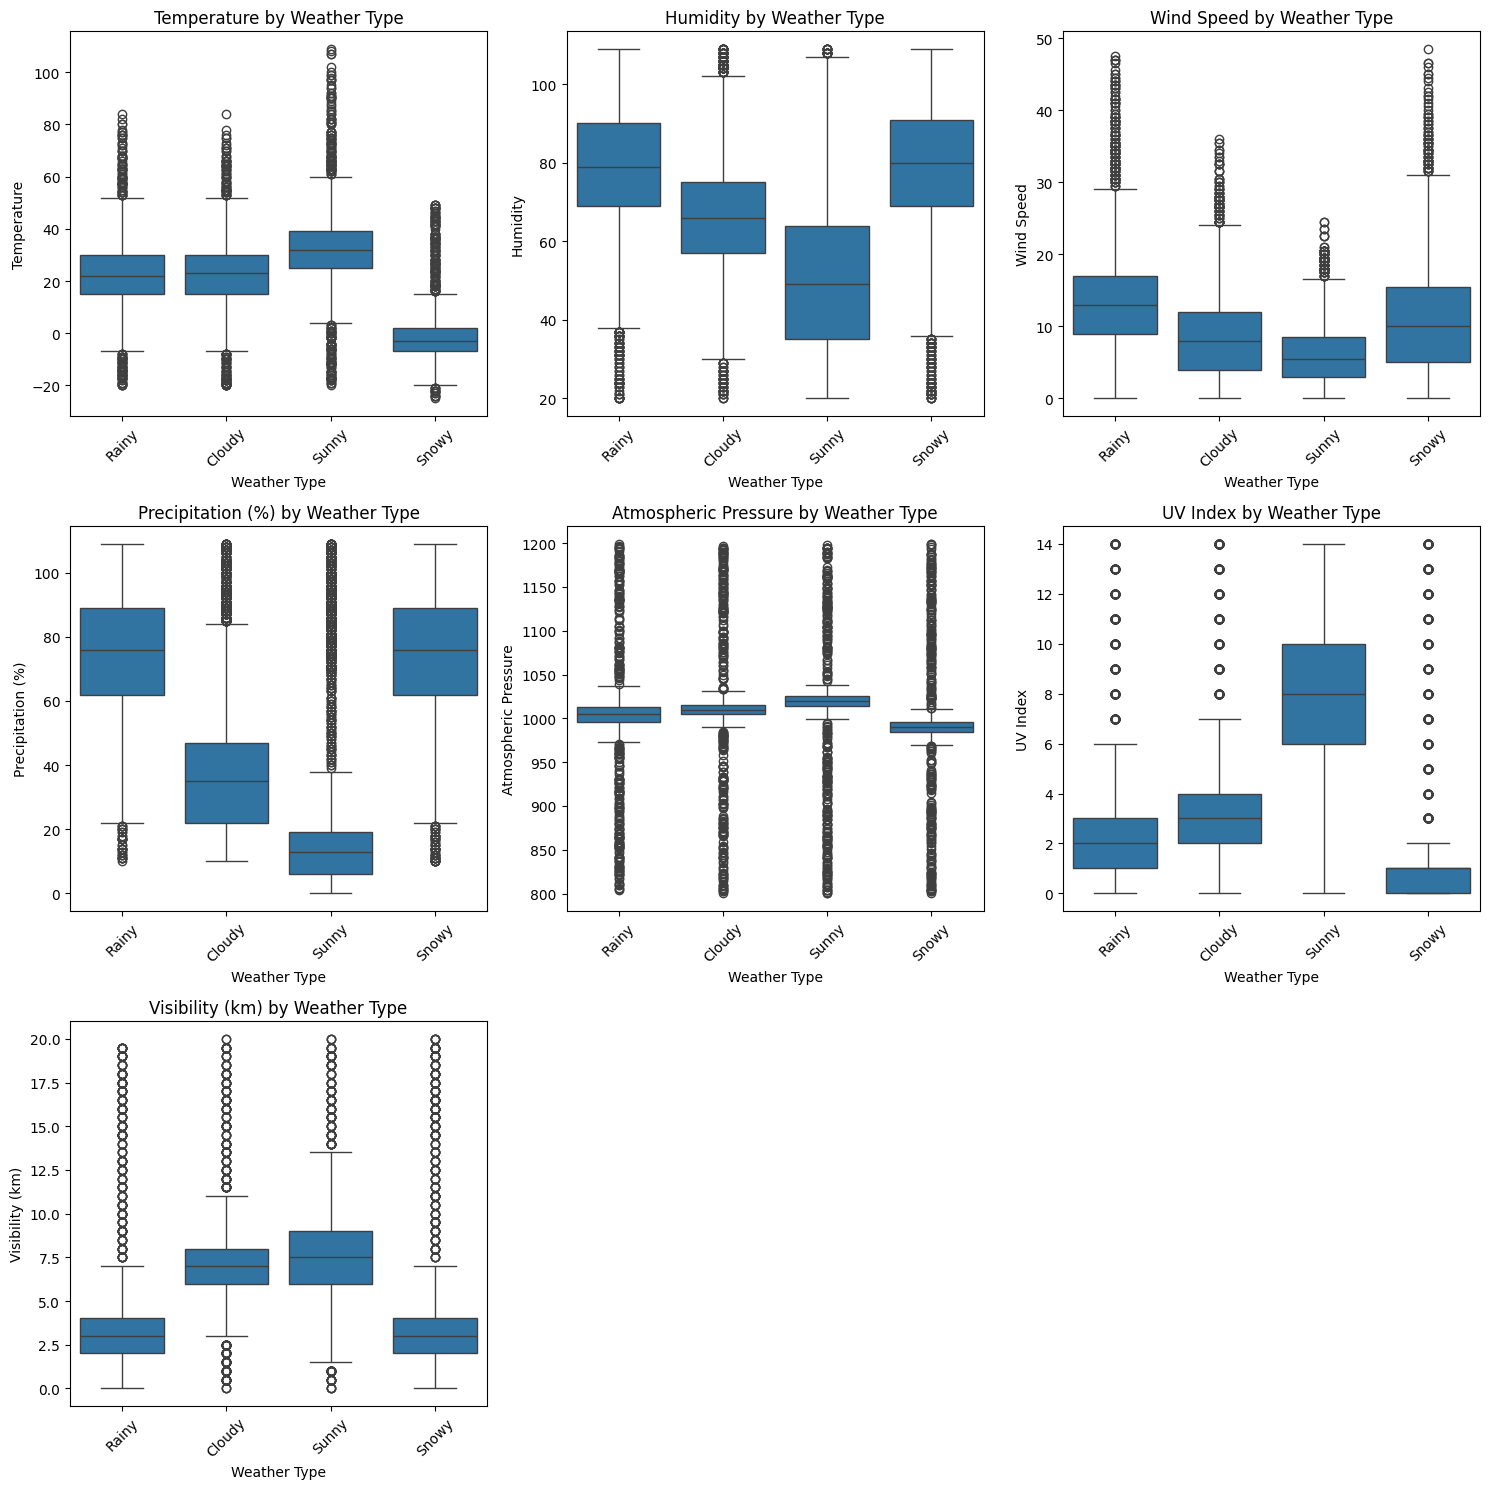

In [6]:
from Data_visualization import Data_visualization

# Визуализируем данные
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                  'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Посмотрим выбросы
Data_visualization.boxplot(df, 'Weather Type', numerical_cols)

Будем избавляться от выбрасов, их нереально много

In [38]:
from Data_processor import Data_processor

# Делаем копию нашего датафрейма, чтобы не запортить основу
cf = df.copy()
# Обработка выбросов
cf = Data_processor.clip_outliers(cf, 'Temperature', -20, 50)
cf = Data_processor.clip_outliers(cf, 'Humidity', 0, 100)
cf = Data_processor.clip_outliers(cf, 'Wind Speed', 0, 30)
cf = Data_processor.clip_outliers(cf, 'Precipitation (%)', 0, 100)
cf = Data_processor.clip_outliers(cf, 'Atmospheric Pressure', 970, 1050)
cf = Data_processor.clip_outliers(cf, 'UV Index', 0, 14)
cf = Data_processor.clip_outliers(cf, 'Visibility (km)', 0, 14)

Снова посмотрим на выбросы на Ящиках с усами

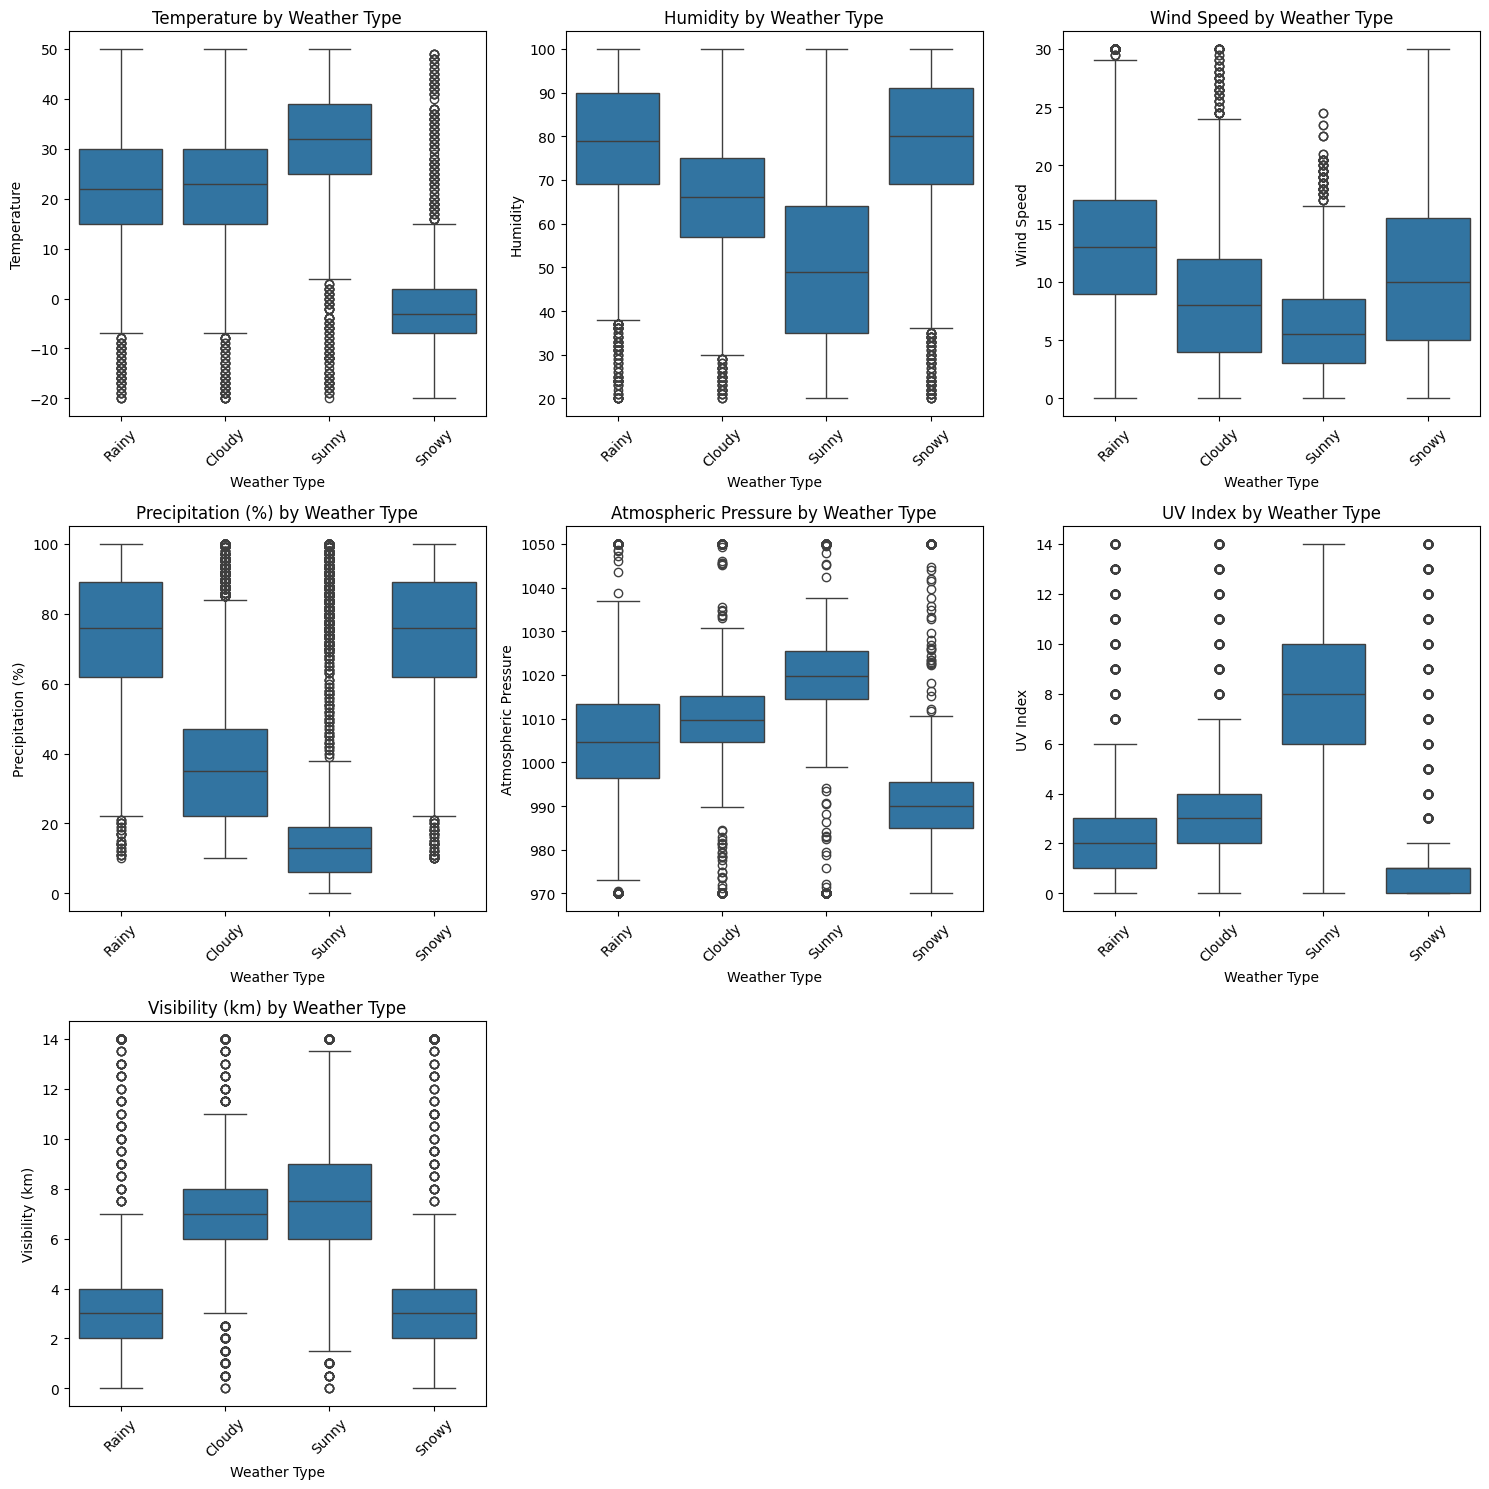

In [39]:
Data_visualization.boxplot(cf, 'Weather Type', numerical_cols)

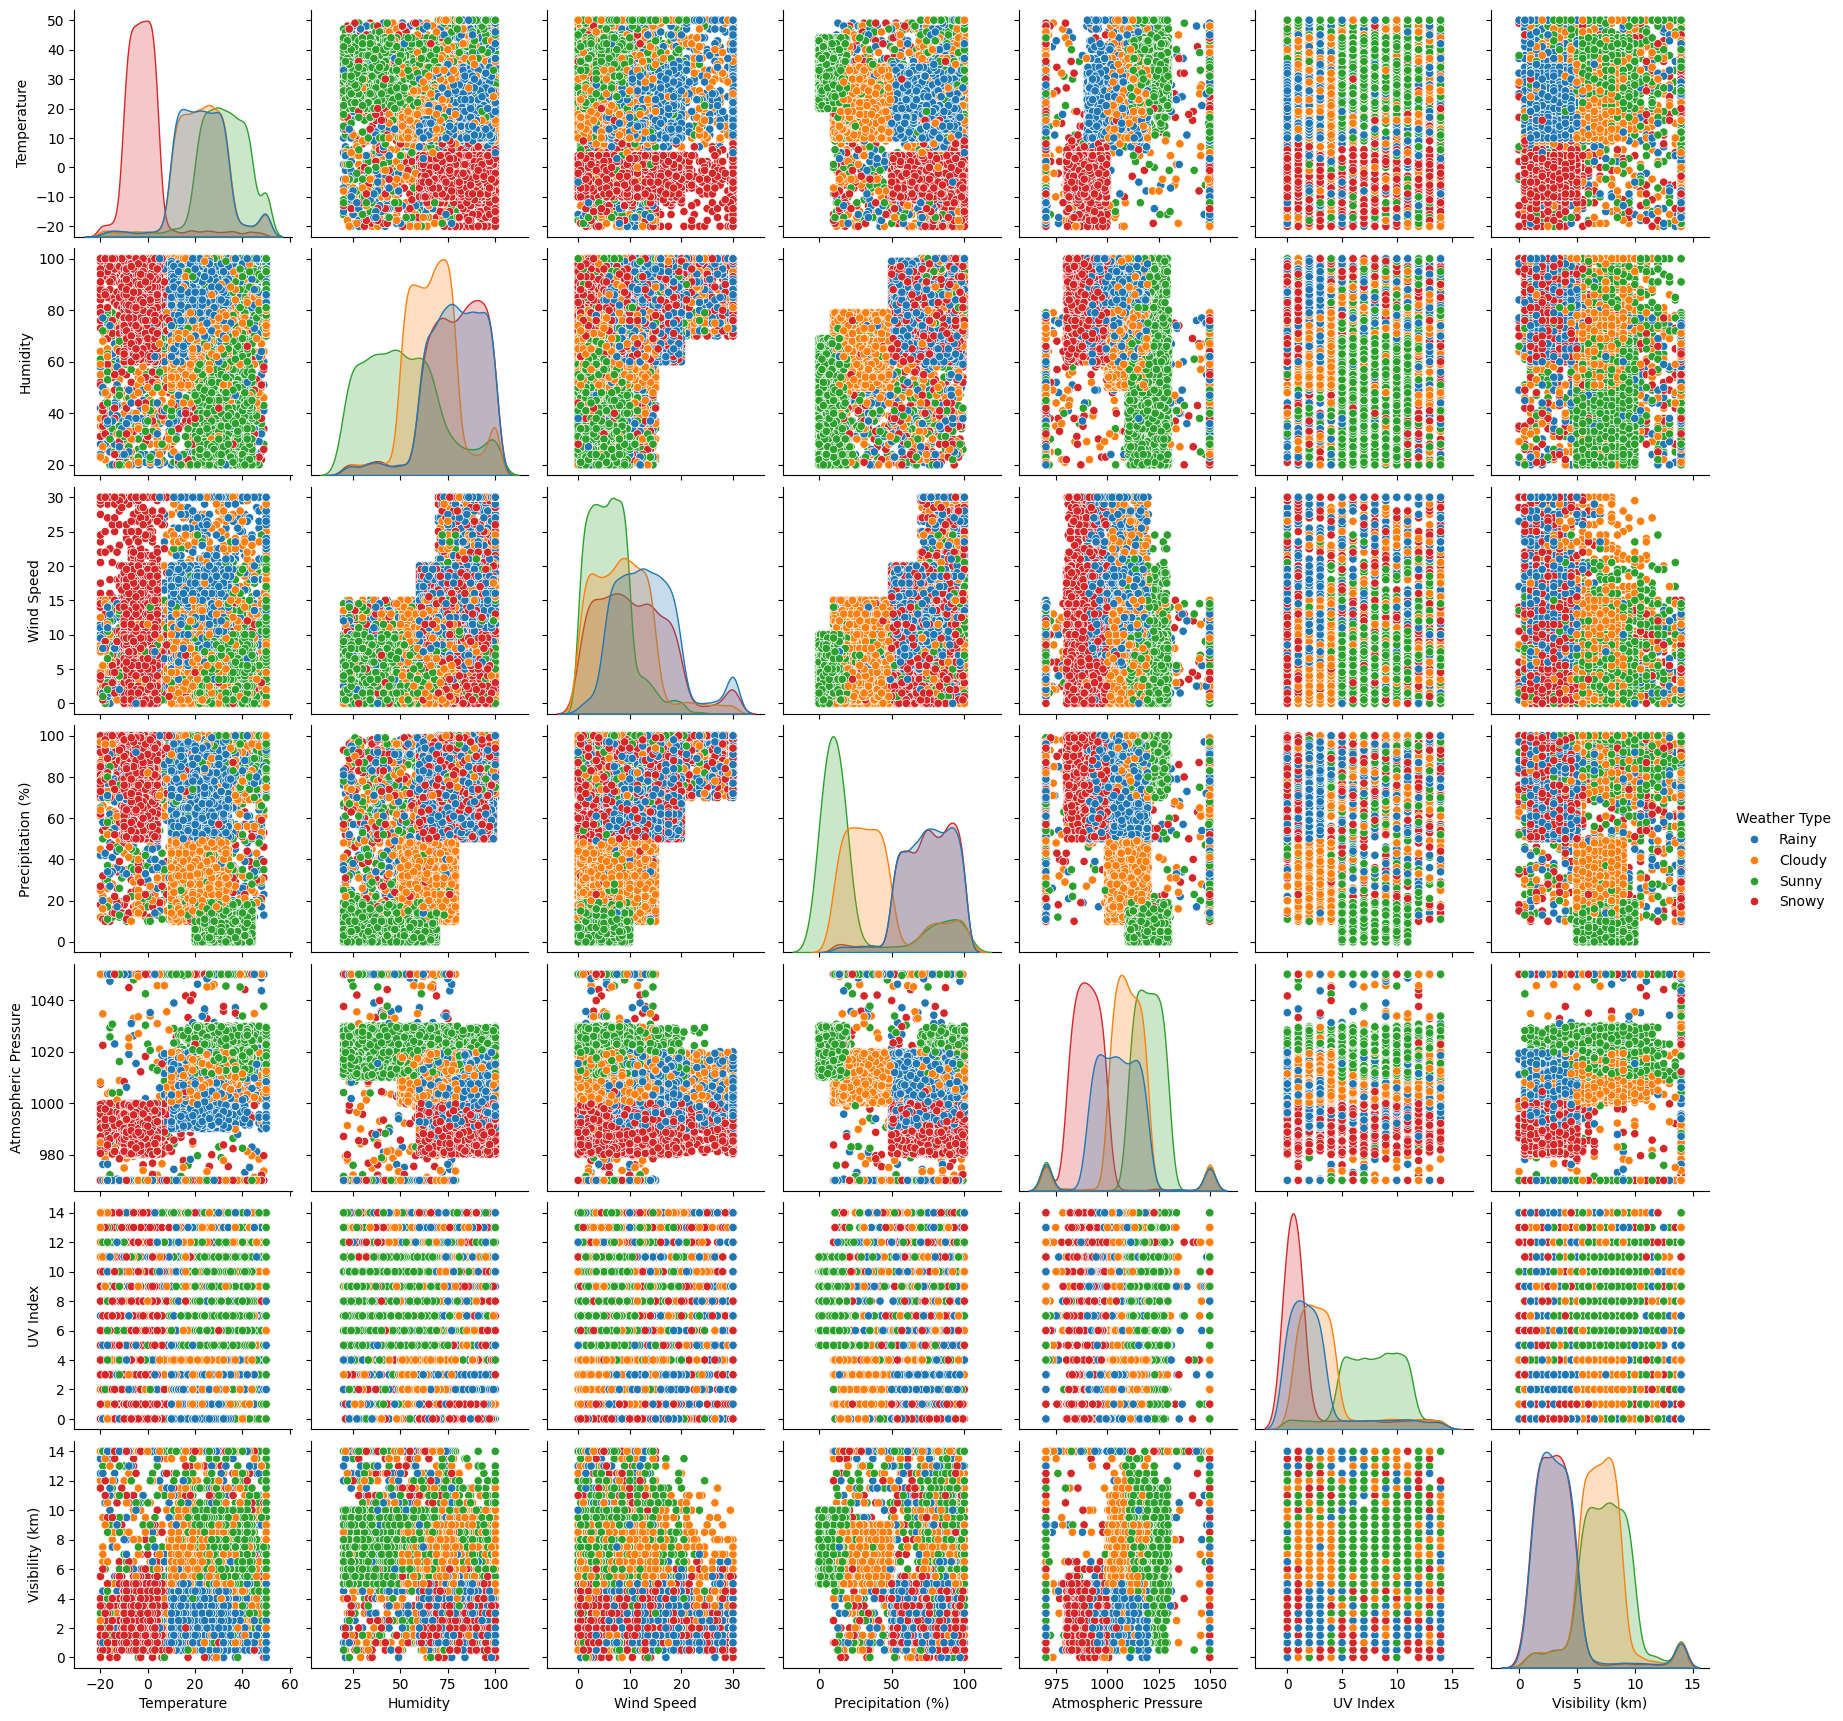

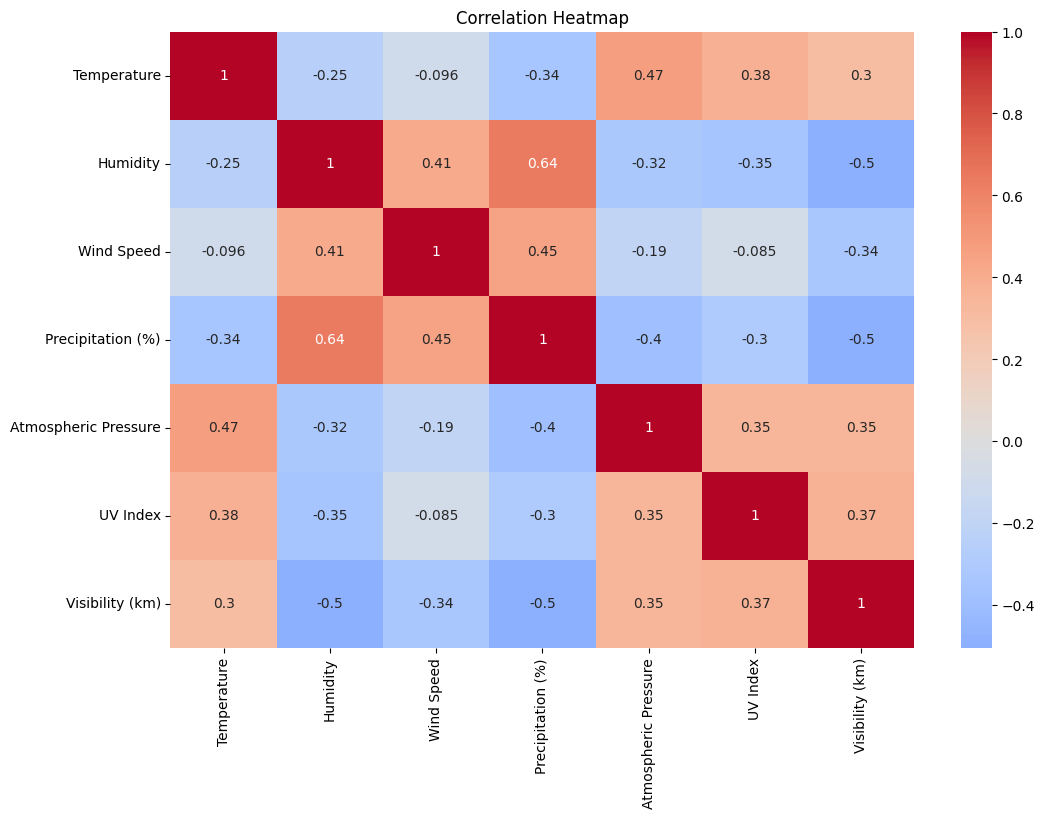

In [32]:
Data_visualization.pairplot(cf, 'Weather Type', numerical_cols)
Data_visualization.heatmap(cf, 'Weather Type', numerical_cols)

In [41]:
from Data_trainer import Data_trainer

# Подготовка данных
X = cf.drop('Weather Type', axis=1)
y = cf['Weather Type']

# Кодируем категориальные переменные
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Кодируем целевую переменную
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Обучаем модели и получаем детальные отчеты
rf_model, rf_accuracy, rf_report = Data_trainer.train_random_forest(X, y_encoded)
log_model, log_accuracy, log_report = Data_trainer.train_logistic_regression(X, y_encoded)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Classification Report:")
print(rf_report)

print(f"\nLogistic Regression Accuracy: {log_accuracy:.4f}")
print("Logistic Regression Classification Report:")
print(log_report)

# Для декодирования предсказаний обратно в исходные названия можно использовать:
# le_target.inverse_transform(predictions)

Random Forest Accuracy: 0.9148
Logistic Regression Accuracy: 0.8458


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
